In [4]:
import nsfg
import numpy as np
import pandas as pd
import thinkplot
import thinkstats2
import scipy

In [8]:
info=nsfg.ReadFemResp()
resp=pd.DataFrame(info.dropna(subset=["timesmar","jintendn"]))

In [10]:
#Q1
times=resp.timesmar
timesmar = times.dropna()
print "mean value:"+str(float(timesmar.mean())), "standard deviation:"+str(float(timesmar.std()))

mean value:1.08659217877 standard deviation:0.3215568596


In [11]:
jints=resp.jintendn
jintendn=jints.dropna()
print "mean value:"+str(float(jintendn.mean())), "standard deviation:"+str(float(jintendn.std()))

mean value:2.71229050279 standard deviation:9.85921861845


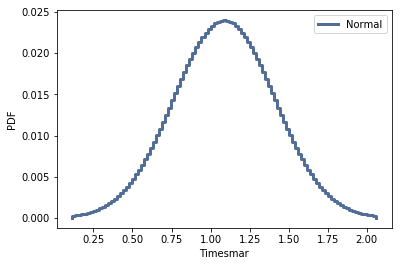

In [12]:
timespdf=thinkstats2.NormalPdf(timesmar.mean(),timesmar.std())
timespmf=timespdf.MakePmf()
thinkplot.Pmf(timespmf, label="Normal")
thinkplot.Config(xlabel="Timesmar", ylabel="PDF")

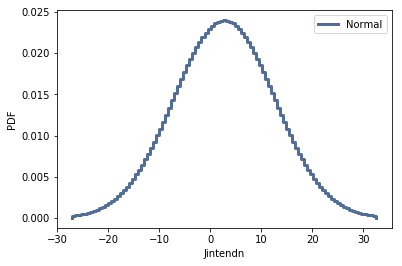

In [13]:
jintspdf=thinkstats2.NormalPdf(jintendn.mean(),jintendn.std())
jintspmf=jintspdf.MakePmf()
thinkplot.Pmf(jintspmf, label="Normal")
thinkplot.Config(xlabel="Jintendn", ylabel="PDF")

Means are almost the same.However their standard deviations are unbalanced. Timesmar values btw 0.6 - 1.4, Jintendn values btw -10 - +10.

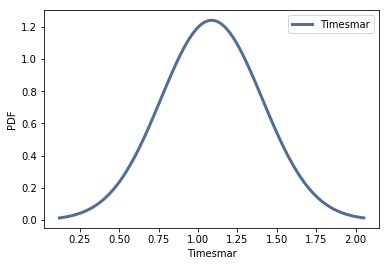

In [14]:
#Q2
thinkplot.Pdf(timespdf, label="Timesmar")
thinkplot.Config(xlabel="Timesmar",ylabel="PDF")

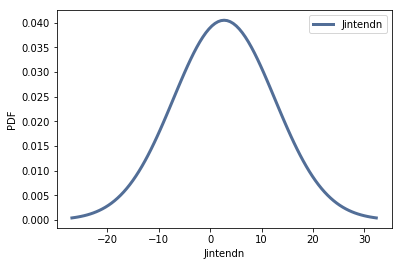

In [15]:
thinkplot.Pdf(jintspdf, label="Jintendn")
thinkplot.Config(xlabel="Jintendn",ylabel="PDF")

In [16]:
def PearsonSkewness(x):
    mean=x.mean()
    var=x.var()
    std=x.std()
    median=x.median()
    val=3*(mean-median)/std
    return val

In [18]:
print "Skewness values of timesmar and jintendn:"+str(float(timesmar.skew()))+str(float(jintendn.skew()))
print "Pearson skewness values of timesmar and jintendn:"+str(float(PearsonSkewness(timesmar)))+str(float(PearsonSkewness(jintendn)))


Skewness values of timesmar and jintendn:4.310144095219.56662578534
Pearson skewness values of timesmar and jintendn:0.8078712319690.521022172971


Due to the fact that their skewnesses are positive, values are skewed to the right.

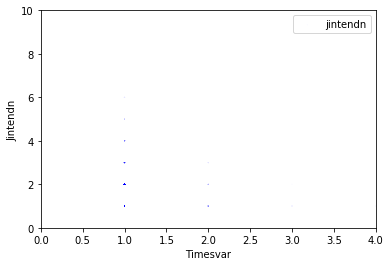

In [19]:
#Q3
thinkplot.Scatter(resp.timesmar,resp.jintendn, alpha=0.02, s=2)
thinkplot.Config(xlabel="Timesvar",ylabel="Jintendn", axis=[0,4,0,10])

In [24]:
varian = np.arange(1.0, 5.0, 1)
print(varian)
values = np.digitize(resp.timesmar, varian)
print(values)
groups= resp.groupby(values)
print (groups)

[1. 2. 3. 4.]
[1 1 2 ... 1 1 2]


In [25]:
times_mean = [group.timesmar.mean() for i, group in groups]
tim_jint_cdf = [thinkstats2.Cdf(group.jintendn) for i, group in groups]

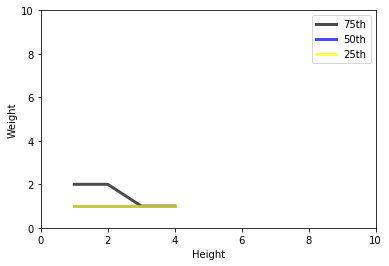

In [27]:
CustomColors = ["black","blue","yellow"]
percentage = [75, 50, 25]
for i in range(len(percentage)):
    jint_per = [cdf.Percentile(percentage[i]) for cdf in tim_jint_cdf]
    label = '%dth' % percentage[i]
    thinkplot.Plot(times_mean, jint_per, label=label,color=CustomColors[i])
    
thinkplot.Config(xlabel='Height',ylabel='Weight',axis=[0,10,0,10])


In [32]:
#Q4
scipy.stats.pearsonr(timesmar,jintendn)

(-0.03652346652385939, 0.23171606728546632)

In [33]:
scipy.stats.spearmanr(timesmar,jintendn)

SpearmanrResult(correlation=-0.08337747790348256, pvalue=0.006256598683894432)

Due to the fact that their values are negative, their relations are randomly.

Also, p value shows that they are not statistically significant.